In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [19]:
df_transactions = pd.read_csv('transactions.csv')
df_transactions['dates'] = pd.to_datetime(df_transactions['dates'])
df_transactions.tail()

,dates,SKU,user,price
1334255,2019-04-21,16663,20223,2240.0
1334256,2019-04-21,16663,25555,2240.0
1334257,2019-04-21,16663,47340,2240.0
1334258,2019-04-21,16663,23762,2240.0
1334259,2019-04-21,16663,48007,2240.0


In [20]:
df_wholesale_trade_table = pd.read_csv('wholesale_trade_table.csv')
df_wholesale_trade_table = df_wholesale_trade_table.sort_values(by=['year', 'month', 'week_num'])
df_wholesale_trade_table.tail()

,SKU,year,week_num,month,cost_price
60898,98842,2019,52,12,1206.0
60976,99266,2019,52,12,1632.0
61079,99310,2019,52,12,355.0
61181,99974,2019,52,12,2900.0
61251,99996,2019,52,12,692.0


# Data preparation

In [2]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import requests

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [3]:
def date_to_datetime(df):
    df['year'] = df.dates.dt.year
    df['month'] = df.dates.dt.month
    df['quarter_of_year'] = df.dates.dt.quarter
    df['week_num'] = df.dates.dt.isocalendar().week.astype(int)
    df['day_of_year'] = df.dates.dt.dayofyear
    df['day_of_month'] = df.dates.dt.day
    df['day_of_week'] = df.dates.dt.dayofweek
    df["is_wknd"] = df.dates.dt.weekday // 4
    df['is_month_start'] = df.dates.dt.is_month_start.astype(int)
    df['is_month_end'] = df.dates.dt.is_month_end.astype(int)
#     df = df.drop(columns=['dates'])

    return df

In [11]:
dec =['2019-12-01', '2019-12-02', '2019-12-03', '2019-12-04', '2019-12-05',
'2019-12-06', '2019-12-07', '2019-12-08', '2019-12-09', '2019-12-10',
'2019-12-11', '2019-12-12', '2019-12-13', '2019-12-14', '2019-12-15',
'2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
'2019-12-21', '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
'2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30']

df_transactions = pd.read_csv('transactions.csv')
lst_sku = df_transactions.SKU.unique().tolist()

df_transactions['dates'] = pd.to_datetime(df_transactions['dates'])
df_transactions['year'] = df_transactions.dates.dt.year
df_transactions['month'] = df_transactions.dates.dt.month
df_transactions['week_num'] = df_transactions.dates.dt.isocalendar(
).week.astype(int)
df_transactions = df_transactions.sort_values(by=['year', 'month', 'week_num'])


df_wholesale_trade_table = pd.read_csv('wholesale_trade_table.csv')
df_wholesale_trade_table = df_wholesale_trade_table.sort_values(
    by=['year', 'month', 'week_num'])

df_price_cost = pd.merge(df_transactions, df_wholesale_trade_table,
                         how='left', on=['SKU', 'year',
                                         'month', 'week_num'])

df_price_cost = date_to_datetime(df_price_cost)
df_price_cost = df_price_cost.drop(columns=['user','cost_price'])
df_price_cost = df_price_cost.drop_duplicates()

In [ ]:
df_update = pd.DataFrame(lst_sku, columns =['SKU'])
df_update['dates'] = dec[0]
df_update['dates'] = pd.to_datetime(df_update['dates'])

df_update['year'] = df_update.dates.dt.year
df_update['month'] = df_update.dates.dt.month
df_update['week_num'] = df_update.dates.dt.isocalendar().week.astype(int)

df_update = date_to_datetime(df_update)
df_update

In [1]:
#     Y_train = df_price_cost['price']
#     X_train = df_price_cost.drop(columns=['price'])

#     params = {
#         'n_estimators': 1000,
#         'max_depth': 7,
#         'learning_rate': 0.1,
#     }

#     model = lgb.LGBMRegressor(**params)
#     model.fit(X_train, Y_train)

#     forecast = model.predict(df_update)
#     df_update['price'] = forecast

#     df_price_cost = pd.concat([df_price_cost, df_update]).reset_index(drop = True)


#     UUID = '278a6454351246b696fd4a2bf5aec4d9'

#     URL_BEGIN_DATA = 'https://lab.karpov.courses/hardml-api/project-1/task/{uuid}/begin'
#     req = requests.post(URL_BEGIN_DATA.format(uuid=UUID))
#     print(req.json())

#     URL_TASK_DATA_GET = 'https://lab.karpov.courses/hardml-api/project-1/task/{uuid}/data'
#     response = requests.get(URL_TASK_DATA_GET.format(uuid=UUID))
#     print(response)

#     df = pd.read_json(response.json())
#     df = pd.merge(df, df_update, how='left', on=['SKU'])
#     df = df[['dates', 'SKU', 'user_id', 'price']]
#     df

In [14]:
dec =['2019-12-01', '2019-12-02', '2019-12-03', '2019-12-04', '2019-12-05',
'2019-12-06', '2019-12-07', '2019-12-08', '2019-12-09', '2019-12-10',
'2019-12-11', '2019-12-12', '2019-12-13', '2019-12-14', '2019-12-15',
'2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
'2019-12-21', '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
'2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30']

df_transactions = pd.read_csv('transactions.csv')
lst_sku = df_transactions.SKU.unique().tolist()

df_transactions['dates'] = pd.to_datetime(df_transactions['dates'])
df_transactions['year'] = df_transactions.dates.dt.year
df_transactions['month'] = df_transactions.dates.dt.month
df_transactions['week_num'] = df_transactions.dates.dt.isocalendar(
).week.astype(int)
df_transactions = df_transactions.sort_values(by=['year', 'month', 'week_num'])


df_wholesale_trade_table = pd.read_csv('wholesale_trade_table.csv')
df_wholesale_trade_table = df_wholesale_trade_table.sort_values(
    by=['year', 'month', 'week_num'])

df_price_cost = pd.merge(df_transactions, df_wholesale_trade_table,
                         how='left', on=['SKU', 'year',
                                         'month', 'week_num'])

df_price_cost = date_to_datetime(df_price_cost)
df_price_cost = df_price_cost.drop(columns=['user'])
df_price_cost = df_price_cost[['dates', 'SKU', 'price']]

df_price_cost = df_price_cost.drop_duplicates()


UUID = '278a6454351246b696fd4a2bf5aec4d9'

In [15]:
df_price_cost

,dates,SKU,price
0,2018-01-04,50389,2432.0
6,2018-01-05,50389,2432.0
13,2018-01-06,50389,2432.0
17,2018-01-07,50389,2432.0
22,2018-01-05,88333,2831.0
...,...,...,...
1334243,2019-11-26,91775,1355.0
1334246,2019-11-27,91775,1355.0
1334251,2019-11-28,91775,1355.0
1334254,2019-11-29,91775,1355.0


In [6]:
lst_sku = df_transactions.SKU.unique().tolist()
lst_sku = lst_sku[:10]

In [51]:
from statsmodels.tsa.arima.model import ARIMA

df_new = pd.DataFrame()

for i in range(len(lst_sku)):
    print(i)
    df_sku = df_price_cost[df_price_cost['SKU']
                           == lst_sku[i]].reset_index(drop=True)
    df_sku_test = df_update[df_update['SKU']
                            == lst_sku[i]].reset_index(drop=True)

    ARIMA_ = ARIMA(df_sku.price.values, order=(0, 0, 10))
    ARIMA_model = ARIMA_.fit()

    df_sku_test['price'] = ARIMA_model.predict(
        start=len(df_sku), end=len(df_sku) + len(df_sku_test)-1)
    df_new = pd.concat([df_new, df_sku_test])
    
df_price_cost = pd.concat([df_price_cost, df_new]).reset_index(drop = True)

0
1
2
3


/Applications/anaconda3/envs/hard_ml/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


4
5


/Applications/anaconda3/envs/hard_ml/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6
7


/Applications/anaconda3/envs/hard_ml/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/envs/hard_ml/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


8


/Applications/anaconda3/envs/hard_ml/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


9


<AxesSubplot:xlabel='dates'>

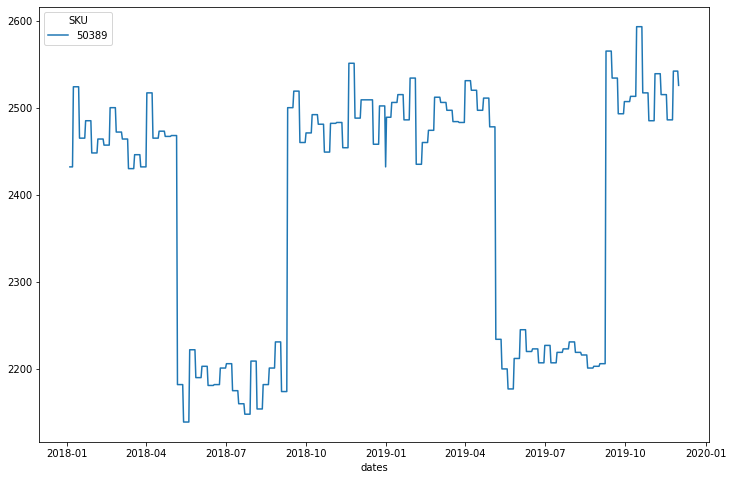

In [58]:
pivot_t = a.pivot_table(index='dates',columns='SKU', values='price')
plt.figure(figsize=(12,8))
sns.lineplot(data = pivot_t, dashes=False)

In [124]:
dec =['2019-12-01', '2019-12-02', '2019-12-03', '2019-12-04', '2019-12-05',
'2019-12-06', '2019-12-07', '2019-12-08', '2019-12-09', '2019-12-10',
'2019-12-11', '2019-12-12', '2019-12-13', '2019-12-14', '2019-12-15',
'2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
'2019-12-21', '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
'2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30']

df_transactions = pd.read_csv('transactions.csv')
lst_sku = df_transactions.SKU.unique().tolist()

df_transactions['dates'] = pd.to_datetime(df_transactions['dates'])
df_transactions['year'] = df_transactions.dates.dt.year
df_transactions['month'] = df_transactions.dates.dt.month
df_transactions['week_num'] = df_transactions.dates.dt.isocalendar(
).week.astype(int)
df_transactions = df_transactions.sort_values(by=['year', 'month', 'week_num'])


df_wholesale_trade_table = pd.read_csv('wholesale_trade_table.csv')
df_wholesale_trade_table = df_wholesale_trade_table.sort_values(
    by=['year', 'month', 'week_num'])

df_price_cost = pd.merge(df_transactions, df_wholesale_trade_table,
                         how='left', on=['SKU', 'year',
                                         'month', 'week_num'])

df_price_cost = date_to_datetime(df_price_cost)
df_price_cost = df_price_cost.drop(columns=['user'])
# df_price_cost = df_price_cost[['dates', 'SKU', 'price']]

df_price_cost = df_price_cost.drop_duplicates()


UUID = '278a6454351246b696fd4a2bf5aec4d9'

In [125]:
df_price_cost

,dates,SKU,price,year,month,week_num,cost_price,quarter_of_year,day_of_year,day_of_month,day_of_week,is_wknd,is_month_start,is_month_end
0,2018-01-04,50389,2432.0,2018,1,1,2097.0,1,4,4,3,0,0,0
6,2018-01-05,50389,2432.0,2018,1,1,2097.0,1,5,5,4,1,0,0
13,2018-01-06,50389,2432.0,2018,1,1,2097.0,1,6,6,5,1,0,0
17,2018-01-07,50389,2432.0,2018,1,1,2097.0,1,7,7,6,1,0,0
22,2018-01-05,88333,2831.0,2018,1,1,2483.0,1,5,5,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334243,2019-11-26,91775,1355.0,2019,11,48,1189.0,4,330,26,1,0,0,0
1334246,2019-11-27,91775,1355.0,2019,11,48,1189.0,4,331,27,2,0,0,0
1334251,2019-11-28,91775,1355.0,2019,11,48,1189.0,4,332,28,3,0,0,0
1334254,2019-11-29,91775,1355.0,2019,11,48,1189.0,4,333,29,4,1,0,0


In [126]:
lst_sku = df_transactions.SKU.unique().tolist()
lst_sku_test = lst_sku

In [127]:
from statsmodels.tsa.arima.model import ARIMA

UUID = '278a6454351246b696fd4a2bf5aec4d9'

URL_BEGIN_DATA = 'https://lab.karpov.courses/hardml-api/project-1/task/{uuid}/begin'
req = requests.post(URL_BEGIN_DATA.format(uuid=UUID))
print(req.json())

for i in range(31):
    print(f"number {i}")
    
    URL_TASK_DATA_GET = 'https://lab.karpov.courses/hardml-api/project-1/task/{uuid}/data'
    response = requests.get(URL_TASK_DATA_GET.format(uuid=UUID))
    df = pd.read_json(response.json())
#     print(df)
    df['dates'] = pd.to_datetime(df['dates'])
    print(response)
    
    df_update = pd.DataFrame(lst_sku, columns =['SKU'])
    df_update['dates'] = dec[i]
    df_update['dates'] = pd.to_datetime(df_update['dates'])
    df_update['year'] = df_update.dates.dt.year
    df_update['month'] = df_update.dates.dt.month
    df_update['week_num'] = df_update.dates.dt.isocalendar().week.astype(int)
    df_update = date_to_datetime(df_update)
    df_update = pd.merge(df_update, df_wholesale_trade_table,
                         how='left', on=['SKU', 'month', 'week_num'])
    df_update = df_update.drop_duplicates(subset=['SKU'], keep='first')
    df_update = df_update.drop(columns=['year_y'])
    df_update = df_update.rename(columns={'year_x':'year'})
#     df_update = df_update[['dates', 'SKU']]
         
    df_new = pd.DataFrame()

    for j in range(len(lst_sku_test)):
#         print(j)
        df_sku = df_price_cost[df_price_cost['SKU']
                               == lst_sku_test[j]].reset_index(drop=True)
        df_sku_test = df_update[df_update['SKU']
                                == lst_sku_test[j]].reset_index(drop=True)

        ARIMA_ = ARIMA(df_sku.price.values, order=(0, 0, 0))
        ARIMA_model = ARIMA_.fit()

        df_sku_test['price'] = ARIMA_model.predict(
            start=len(df_sku), end=len(df_sku) + len(df_sku_test)-1)
        df_new = pd.concat([df_new, df_sku_test])
        
    df_new['dates'] = pd.to_datetime(df_new['dates'])
    df_price_cost = pd.concat([df_price_cost, df_new]).reset_index(drop = True)  

    df = pd.merge(df, df_new, how='left', on=['SKU', 'dates'])
    df['dates'] = df['dates'].dt.strftime('%Y-%m-%d')
#     df = df.fillna(100)

    URL_TASK_RESULT_POST = 'https://lab.karpov.courses/hardml-api/project-1/task/{uuid}/result/'
    response_receive = requests.post(URL_TASK_RESULT_POST.format(uuid=UUID),
                                     data=df[['dates', 'SKU', 'user_id', 'price']].to_json(orient='records'))

    print(response_receive.json()['status'])
    print(f'end: {i}')

#     break

{'status': 'ok'}
number 0
<Response [200]>
ok
end: 0
number 1
<Response [200]>
ok
end: 1
number 2
<Response [200]>
ok
end: 2
number 3
<Response [200]>
ok
end: 3
number 4
<Response [200]>
ok
end: 4
number 5
<Response [200]>
ok
end: 5
number 6
<Response [200]>
ok
end: 6
number 7
<Response [200]>
ok
end: 7
number 8
<Response [200]>
ok
end: 8
number 9
<Response [200]>
ok
end: 9
number 10
<Response [200]>
ok
end: 10
number 11
<Response [200]>
ok
end: 11
number 12
<Response [200]>
ok
end: 12
number 13
<Response [200]>
ok
end: 13
number 14
<Response [200]>
ok
end: 14
number 15
<Response [200]>
ok
end: 15
number 16
<Response [200]>
ok
end: 16
number 17
<Response [200]>
ok
end: 17
number 18
<Response [200]>
ok
end: 18
number 19
<Response [200]>
ok
end: 19
number 20
<Response [200]>
ok
end: 20
number 21
<Response [200]>
ok
end: 21
number 22
<Response [200]>
ok
end: 22
number 23
<Response [200]>
ok
end: 23
number 24
<Response [200]>
ok
end: 24
number 25
<Response [200]>
ok
end: 25
number 26
<Resp

ValueError: Invalid file path or buffer object type: <class 'dict'>

In [ ]:
# df_price_cost

In [ ]:
# df_new

In [ ]:
# df

In [114]:
# df_price_cost[df_price_cost['SKU'] == 50389].tail(50)

<AxesSubplot:xlabel='dates'>

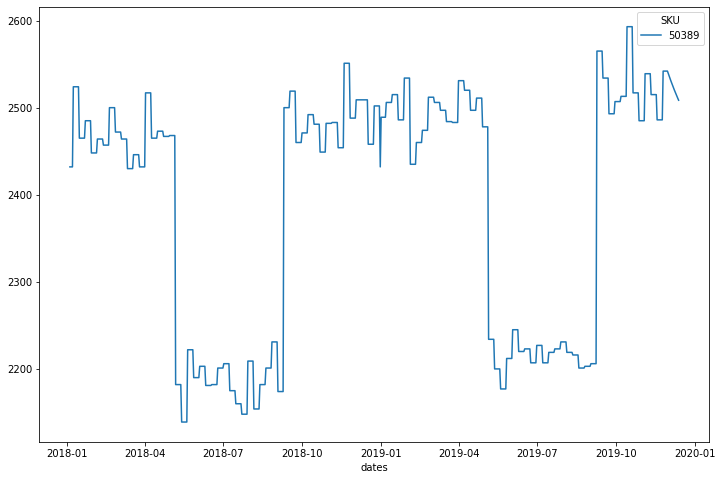

In [112]:
# 88333
a = df_price_cost[df_price_cost['SKU'] == 50389]

pivot_t = a.pivot_table(index='dates',columns='SKU', values='price')
plt.figure(figsize=(12,8))
sns.lineplot(data = pivot_t, dashes=False)

In [117]:
response

<Response [200]>

In [20]:
print(response.json()['status'])

batch processing finished


In [31]:
df_price_cost

,SKU,price,year,month,week_num,quarter_of_year,day_of_year,day_of_month,day_of_week,is_wknd,is_month_start,is_month_end
0,50389,2432.000000,2018,1,1,1,4,4,3,0,0,0
1,50389,2432.000000,2018,1,1,1,5,5,4,1,0,0
2,50389,2432.000000,2018,1,1,1,6,6,5,1,0,0
3,50389,2432.000000,2018,1,1,1,7,7,6,1,0,0
4,88333,2831.000000,2018,1,1,1,5,5,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
348951,21070,2698.519095,2019,12,1,4,364,30,0,0,0,0
348952,84184,2619.889709,2019,12,1,4,364,30,0,0,0,0
348953,24641,2713.391612,2019,12,1,4,364,30,0,0,0,0
348954,91775,2989.193993,2019,12,1,4,364,30,0,0,0,0


In [12]:
URL_TASK_RESULT_GET = 'https://lab.karpov.courses/hardml-api/project-1/task/{uuid}/result'
response = requests.get(URL_TASK_RESULT_GET.format(uuid=UUID))

# Чтобы перевести полученный ответ в pd.DataFrame
df = pd.read_json(response.json())
df.head()

,dates,SKU,user_id,price,bought
0,2019-12-01,16019,37584,170.267683,0
1,2019-12-01,84011,11219,129.417547,1
2,2019-12-01,84011,22075,129.417547,1
3,2019-12-01,29011,29530,168.618080,0
4,2019-12-01,79558,32441,168.801078,1


In [22]:
df_price_cost[df_price_cost['SKU'] == 84011]

,SKU,price,year,month,week_num,cost_price,quarter_of_year,day_of_year,day_of_month,day_of_week,is_wknd,is_month_start,is_month_end
18134,84011,4497.0,2018,3,11,3945.0,1,71,12,0,0,0,0
18136,84011,4497.0,2018,3,11,3945.0,1,72,13,1,0,0,0
18137,84011,4497.0,2018,3,11,3945.0,1,73,14,2,0,0,0
18140,84011,4497.0,2018,3,11,3945.0,1,74,15,3,0,0,0
18141,84011,4497.0,2018,3,11,3945.0,1,75,16,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329453,84011,4499.0,2019,11,48,3878.0,4,330,26,1,0,0,0
1329455,84011,4499.0,2019,11,48,3878.0,4,331,27,2,0,0,0
1329457,84011,4499.0,2019,11,48,3878.0,4,332,28,3,0,0,0
1329459,84011,4499.0,2019,11,48,3878.0,4,333,29,4,1,0,0


In [13]:
df_1 = df[df['bought'] == 1]
df_1.head()

,dates,SKU,user_id,price,bought
1,2019-12-01,84011,11219,129.417547,1
2,2019-12-01,84011,22075,129.417547,1
4,2019-12-01,79558,32441,168.801078,1
5,2019-12-01,86541,37563,129.417547,1
11,2019-12-01,29438,19067,168.618080,1


In [14]:
df_1[df_1['SKU'] == 86541]

,dates,SKU,user_id,price,bought
5,2019-12-01,86541,37563,129.417547,1
2425,2019-12-01,86541,36185,129.417547,1
6261,2019-12-01,86541,44513,129.417547,1
7648,2019-12-01,86541,14860,129.417547,1
9039,2019-12-01,86541,25078,129.417547,1
...,...,...,...,...,...
284311,2019-12-30,86541,73934,122.850185,1
287458,2019-12-30,86541,45384,122.850185,1
287469,2019-12-30,86541,40397,122.850185,1
287478,2019-12-30,86541,18399,122.850185,1


In [17]:
df_0[df_0['SKU'] == 86541]

,dates,SKU,user_id,price,bought
6,2019-12-01,86541,41646,129.417547,0
691,2019-12-01,86541,40984,129.417547,0
692,2019-12-01,86541,20304,129.417547,0
693,2019-12-01,86541,33321,129.417547,0
2085,2019-12-01,86541,50916,129.417547,0
...,...,...,...,...,...
277465,2019-12-29,86541,61556,145.918095,0
277473,2019-12-29,86541,60652,145.918095,0
283383,2019-12-30,86541,33261,122.850185,0
283388,2019-12-30,86541,16711,122.850185,0


In [16]:
df_0 = df[df['bought'] == 0]
df_0.head()

,dates,SKU,user_id,price,bought
0,2019-12-01,16019,37584,170.267683,0
3,2019-12-01,29011,29530,168.618080,0
6,2019-12-01,86541,41646,129.417547,0
7,2019-12-01,46933,12404,168.329791,0
8,2019-12-01,46933,14536,168.329791,0


In [19]:
len(df_0.SKU.unique())

826

In [20]:
df_0.price.sum()

22862756.053476624

In [21]:
df_1.price.sum()

22616533.814178105

In [ ]:
266.710.705